In [16]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [18]:
mean_01 = np.array([1, 3])
cov_01 = np.array([[.8, .3], [.3, .9]])

mean_02 = np.array([-1, 0])
cov_02 = np.array([[2, 0.8], [-0.8, .4]])

dist_01 = np.random.multivariate_normal(mean_01, cov_01, 400)
dist_02 = np.random.multivariate_normal(mean_02, cov_02, 400)

print dist_01.shape , dist_01.shape

(400, 2) (400, 2)


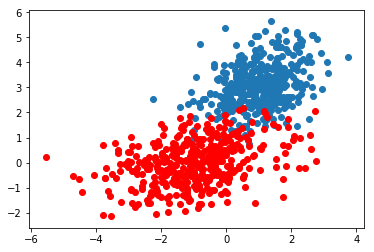

In [19]:
plt.figure(0)

plt.scatter(dist_01[:, 0], dist_01[:, 1])
plt.scatter(dist_02[:, 0], dist_02[:, 1], color='red')

plt.show()

In [20]:
data = np.zeros((dist_01.shape[0] + dist_02.shape[0], dist_01.shape[1]))
data[:dist_01.shape[0]] = dist_01
data[dist_01.shape[0]:] = dist_02
print data.shape, data.mean(axis=0)

(800, 2) [-0.0110327   1.52754968]


In [23]:
# we have our dataset with normalised data ..
#we will use standard normal deviation to shift the center

In [24]:
data_std = (data - data.mean(axis=0))/data.std(axis=0)
print data_std.mean(axis=0), data_std.std(axis=0)


[  1.99007477e-16  -1.80133686e-16] [ 1.  1.]


In [25]:
# above data has mean 0 0 and std 1 1 that is ... it is normally standard deviation 

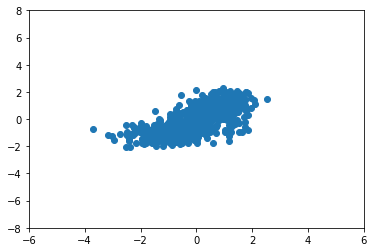

In [26]:
plt.figure(0)
plt.xlim(-6, 6)
plt.ylim(-8, 8)
plt.scatter(data_std[:, 0], data_std[:, 1])
plt.show()

In [32]:
print np.random.random(2)

[ 0.36279662  0.50588664]


In [34]:
print np.random.random((2,3))

[[ 0.66116398  0.25554694  0.45966538]
 [ 0.23760688  0.24042543  0.10191924]]


In [35]:
def distance(x1, x2):
    return np.sqrt(((x1-x2)**2).sum())

In [36]:
centers = {}# will contain centers and their info 
k = 3

for ix in range(k):
    # d is a dict containing coordinates of center and pts lying in its corresponding cluster 
    d = {
        'coords': np.random.random((2,)),
        'pts': []
    }
    centers['c' + str(ix)] = d

print centers

{'c2': {'pts': [], 'coords': array([ 0.77899602,  0.25417006])}, 'c1': {'pts': [], 'coords': array([ 0.28846631,  0.58520761])}, 'c0': {'pts': [], 'coords': array([ 0.37990073,  0.22958217])}}


In [40]:
print centers['c' + str(1)]['coords']

[ 0.28846631  0.58520761]


In [37]:
colors = ['red', 'green', 'blue', 'yellow', 'cyan']

In [75]:
N = data_std.shape[0]

for ix in range(N):
    dist = []
    #calc dist from all 3 centers 
    for ic in range(k):
        d = distance(data_std[ix], centers['c' + str(ic)]['coords'])# ic iterates through cen6ters 0 1 ...k
        dist.append(d)
    dist = np.asarray(dist)
    c = dist.argmin()# returns index of min dist ...this will be the cluster_center..
    #finally we will append pts data_std[ix] to centers dict corresponding to c center obtained from above line
    centers['c' + str(c)]['pts'].append(data_std[ix])
#print centers    


[-0.6825916  -0.08201416]
[-0.2639075  -0.89476402]
[ 0.90374671  1.10240737]


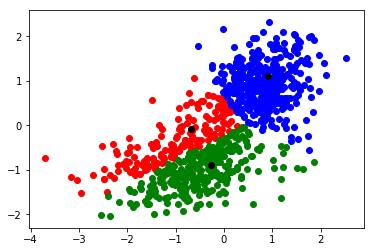

In [76]:
plt.figure(0)
for ik in range(k):
    c = np.asarray(centers['c' + str(ik)]['pts'])
    cc = centers['c' + str(ik)]['coords']
    print cc
    try:
        plt.scatter(c[:, 0], c[:, 1], color=colors[ik])
    except:
        pass
    plt.scatter(cc[0], cc[1], color='black')

[-0.98970254 -0.29388998]
[-0.44724749 -1.02227019]
[ 0.80674816  0.92032276]


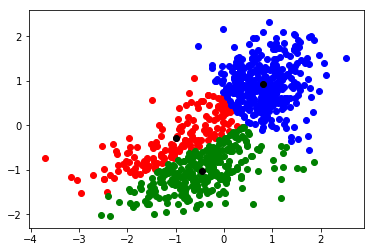

In [77]:
# either run it for few iterations or until a presetted threshold comparing with the shift  of centers
plt.figure(1)    
for ik in range(k):
    c = np.asarray(centers['c' + str(ik)]['pts'])
    if not len(c) is 0:
        #updating center to mean of the resulting points 
        centers['c' + str(ik)]['coords'] = c.mean(axis=0)
    cc = centers['c' + str(ik)]['coords']
    print cc
    try:
        plt.scatter(c[:, 0], c[:, 1], color=colors[ik])
    except:
        pass
    plt.scatter(cc[0], cc[1], color='black')
    centers['c' + str(ik)]['pts'] = []
plt.show()